In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np
from random import randrange

In [2]:
#Set the random seed
torch.manual_seed(0)

In [3]:
# train dataset
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [4]:
# validation dataset
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
print("Print the validation dataset: \n ", validation_dataset)

Print the validation dataset: 
  Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


Plotting the data function

In [5]:
def show_data(sample):
    plt.imshow(sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(sample[1]))

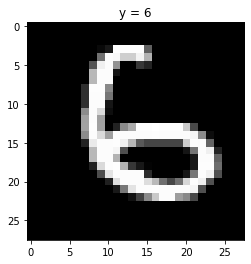

In [27]:
show_data(train_dataset[randrange(len(train_dataset))])
# show_data(train_dataset[60000])

### Class

In [7]:
class SoftMax(nn.Module):
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        z = self.linear(x)
        return z

In [40]:
input_dim = 28 * 28
output_dim = 10

model = SoftMax(input_dim, output_dim)

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
loader_train = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=10000)
loader_validation = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=len(validation_dataset))

In [ ]:
n_epochs=10
loss_list = []
accuracy_list = []

def train_model(epochs):
    for epoch in range(epochs):
#         print(epoch)
        i = 0
        for x, y in loader_train:
#             print(i)
            i += 1
            yhat = model.forward(x.view(-1, 28*28))
            loss = criterion(yhat, y)
#             print(loss)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        loss_list.append(loss.data)    
#         print('loss data: ', loss.data)
#         print('loss list: ', loss_list)
            
            
        correct = 0
        # perform a prediction on the validationdata  
        for x_test, y_test in loader_validation:
            z = model(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            # print(y_test)
            # print(yhat)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / len(validation_dataset)
        accuracy_list.append(accuracy)
        
        
train_model(n_epochs)            

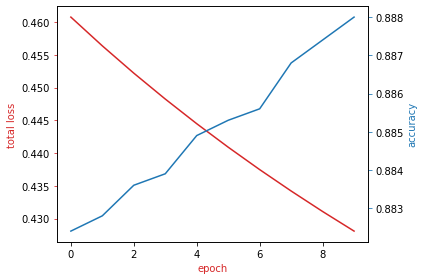

In [39]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()